#Prepare rules for the all the data sets

#1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

#2) Change the minimum length in apriori algorithm

#3) Visulize the obtained rules using different plots


##1)Dataset : Books.csv

In [1]:
#Importing Libraries

In [2]:
!pip install mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
pip install ipython==7.10.0


In [6]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book (1).csv


In [7]:
#Load the data set
book = pd.read_csv("book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [8]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [9]:
book.shape

(2000, 11)

In [10]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [11]:
import matplotlib.pyplot as plt

<BarContainer object of 11 artists>

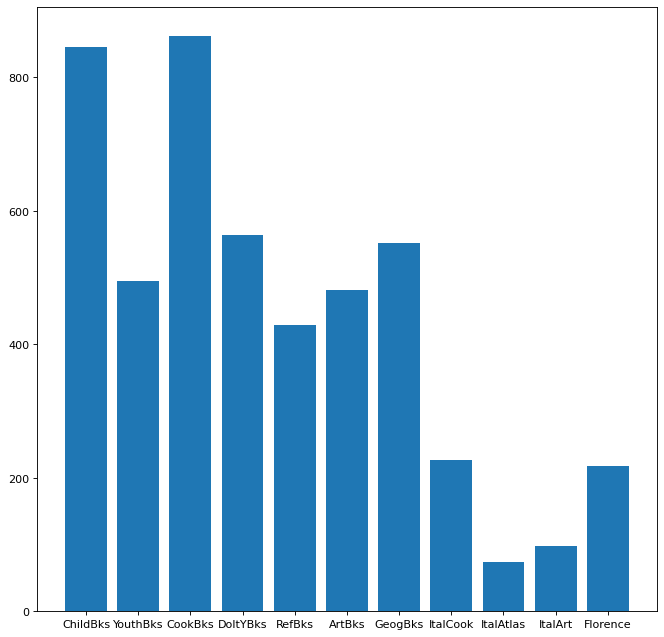

In [12]:
book_count = []
col_names = book.columns
for col_name in col_names:
    book_count.append(book[col_name].value_counts()[1])

plt.figure(figsize=(10, 10), dpi=80)
plt.bar(col_names, book_count)

##Apriori Algorithm

In [13]:
#1)  Association rules with 5% Support and 50% confidence
# With 5% Support

frequent_itemsets=apriori(book,min_support=0.05,use_colnames=True,max_len=6)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(YouthBks, ArtBks, GeogBks, CookBks)"
97,0.0650,"(DoItYBks, CookBks, GeogBks, ArtBks)"
98,0.0510,"(CookBks, YouthBks, GeogBks, ChildBks, DoItYBks)"


In [14]:
# with 50% confidence

rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(CookBks),"(DoItYBks, GeogBks, ChildBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
658,(GeogBks),"(DoItYBks, CookBks, ChildBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923
659,(ChildBks),"(DoItYBks, CookBks, GeogBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
660,(ArtBks),"(DoItYBks, CookBks, GeogBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307


In [15]:
#sort rules based on the lift ratio
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
181,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301,0.821427
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193,0.776487
513,"(ItalCook, ChildBks)","(CookBks, GeogBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923,0.752277
508,"(CookBks, GeogBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125,0.852425
510,"(ItalCook, GeogBks)","(CookBks, ChildBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522,0.734961
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
14,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


In [16]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(CookBks),"(DoItYBks, GeogBks, ChildBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
658,(GeogBks),"(DoItYBks, CookBks, ChildBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923
659,(ChildBks),"(DoItYBks, CookBks, GeogBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
660,(ArtBks),"(DoItYBks, CookBks, GeogBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307


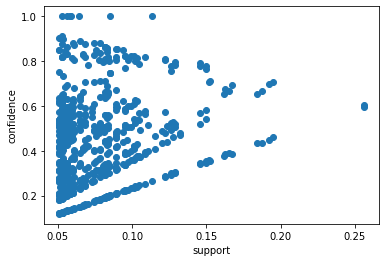

In [17]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'],)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [18]:
#2) Association rules with 10% Support and 70% confidence
# With 10% Support
frequent_itemsets2=apriori(book,min_support=0.1,use_colnames=True,max_len=6)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [19]:
# with 70% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.7)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


In [20]:
#sort rules based on the lift ratio
rules2.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


In [21]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions

rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


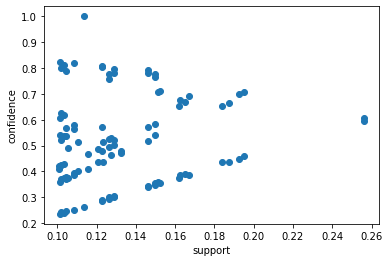

In [22]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'],)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [23]:
#3) Association rules with 20% Support and 60% confidence
# With 20% Support


frequent_itemsets3=apriori(book,min_support=0.2,use_colnames=True,max_len=3)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [24]:
# with 60% confidence
rules3=association_rules(frequent_itemsets3,metric='lift',min_threshold=0.6)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


In [25]:
#sort rules based on the lift ratio
rules3.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


In [26]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions

rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


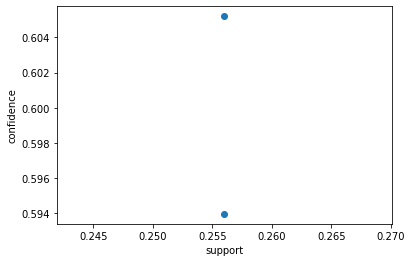

In [31]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'],)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [30]:
#4) Association rules with 20% Support and 90% confidence
# With 20% Support

frequent_itemsets4=apriori(book,min_support=0.2,use_colnames=True,max_len=2)
frequent_itemsets4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [33]:
# with 90% confidence

rules4=association_rules(frequent_itemsets4,metric='lift',min_threshold=0.9)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


In [34]:
#sort rules based on the lift ratio

rules4.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


In [35]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions

rules4[rules4.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


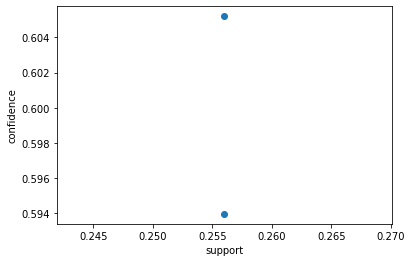

In [38]:
# visualization of obtained rule

plt.scatter(rules4['support'],rules4['confidence'],)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [39]:
#5) Association rules with 10% Support and 80% confidence
# With 10% Support


frequent_itemsets5=apriori(book,min_support=0.10,use_colnames=True,max_len=3)
frequent_itemsets5

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [40]:
# with 80% confidence

rules5=association_rules(frequent_itemsets5,metric='lift',min_threshold=0.8)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


In [41]:
#sort rules based on the lift ratio

rules5.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


In [42]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions

rules5[rules5.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


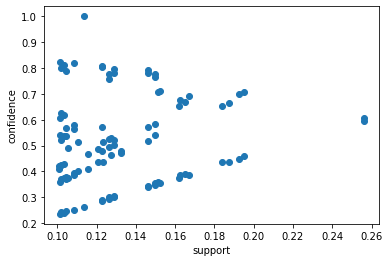

In [43]:
# visualization of obtained rule

plt.scatter(rules5['support'],rules5['confidence'],)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

#Lower the Confidence level Higher the no. of rules and vice-versa Higher the Support, lower the no. of rules. Higher the max length , higher the no.of rules So, we can conclude that these 3 parameters different combinations can generate different rules.

##2)Dataset : my_Movies

In [44]:
#Importing Libraries

In [45]:
!pip install mlxtend

In [46]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend

In [48]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#pip install ipython==7.10.0

In [49]:
from google.colab import files
uploaded = files.upload()

Saving my_movies.csv to my_movies.csv


In [50]:
#Load the data set
movies = pd.read_csv("my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [51]:
movie2=movies.iloc[:,5:]
movie2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [52]:
movie2.isnull().count()

Sixth Sense      10
Gladiator        10
LOTR1            10
Harry Potter1    10
Patriot          10
LOTR2            10
Harry Potter2    10
LOTR             10
Braveheart       10
Green Mile       10
dtype: int64

In [53]:
movie2.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
movie2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


<BarContainer object of 10 artists>

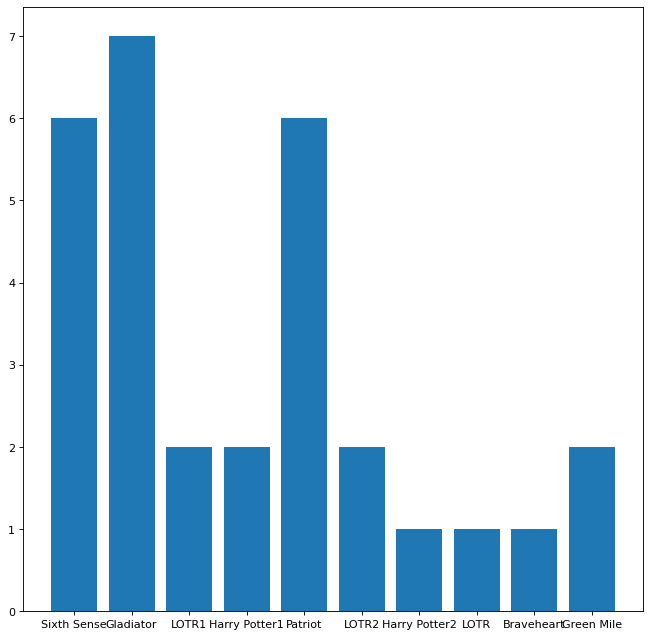

In [56]:
movie_count = []
col_names = movie2.columns
for col_name in col_names:
    movie_count.append(movie2[col_name].value_counts()[1])

plt.figure(figsize=(10, 10), dpi=80)
plt.bar(col_names, movie_count)

##Apriori Algorithm

Associations Rule with 0.10% support and 0.70% confidence interval

In [58]:
#1
frequent_itemsets = apriori(movie2,min_support=.1,use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))

In [59]:
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [60]:
rule1 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(LOTR2, Green Mile, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Green Mile),"(Harry Potter1, LOTR2, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR2, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
248,(LOTR2),"(Harry Potter1, Green Mile, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [61]:
rule1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
212,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
196,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
168,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
211,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
139,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
65,"(LOTR2, LOTR1)",(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000,-0.200000
21,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333
55,(Gladiator),"(Green Mile, Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429
54,"(Green Mile, Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333


In [62]:
rule1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
212,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
196,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
168,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
211,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
139,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
142,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
143,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
146,(LOTR),"(Gladiator, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
201,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
199,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


In [63]:
rule1[rule1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(LOTR2, Green Mile, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Green Mile),"(Harry Potter1, LOTR2, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR2, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
248,(LOTR2),"(Harry Potter1, Green Mile, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

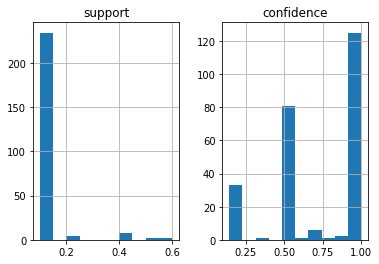

In [64]:
rule1[['support','confidence']].hist()

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

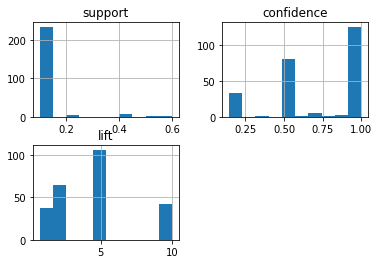

In [65]:
rule1[['support','confidence','lift']].hist()

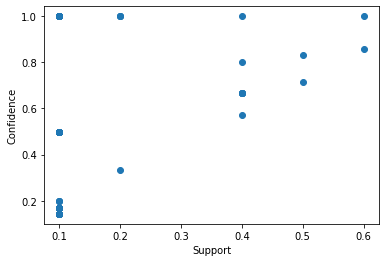

In [66]:
plt.scatter(rule1['support'],rule1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

<Axes: xlabel='lift'>

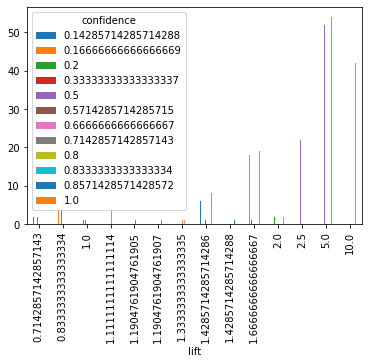

In [67]:
pd.crosstab(rule1.lift,rule1.confidence).plot(kind="bar")

<ipython-input-69-6ceb647e59e8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rule1['lift'])


<Axes: xlabel='lift', ylabel='Density'>

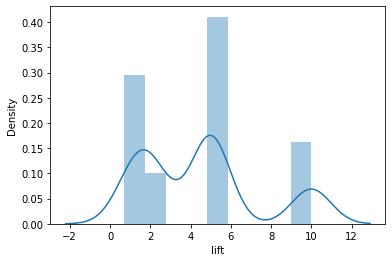

In [69]:
import seaborn as sns
sns.distplot(rule1['lift'])

In [71]:
#2
frequent_itemsets = apriori(movie2, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Sixth Sense, Patriot)"


In [72]:
rule2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.6)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
7,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000


In [73]:
rule2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


In [74]:
rule2.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


In [75]:
rule2[rule2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
7,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

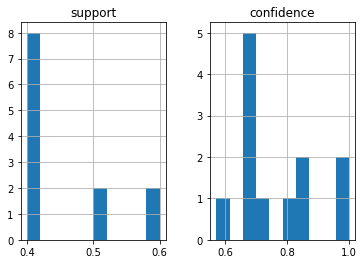

In [76]:
rule2[['support','confidence']].hist()

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

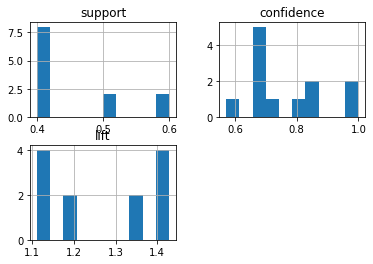

In [77]:
rule2[['support','confidence','lift']].hist()

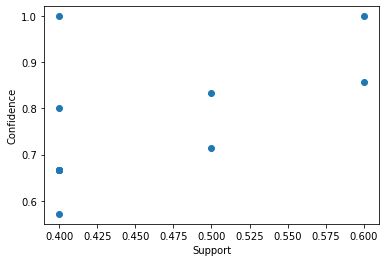

In [78]:
plt.scatter(rule2['support'],rule2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

<Axes: xlabel='lift'>

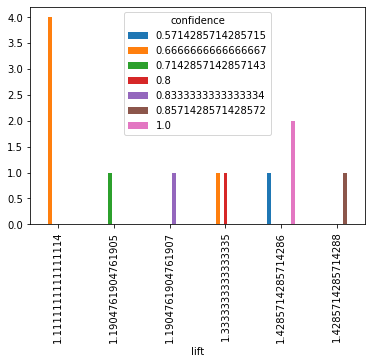

In [79]:
pd.crosstab(rule2.lift,rule2.confidence).plot(kind="bar")

<ipython-input-80-f5bf0300855a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rule2['lift'])


<Axes: xlabel='lift', ylabel='Density'>

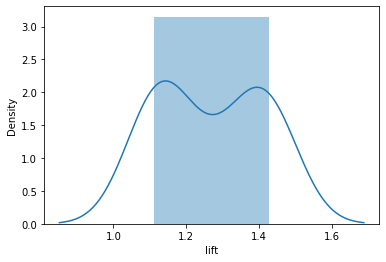

In [80]:
sns.distplot(rule2['lift'])

In [82]:
#3
frequent_itemsets = apriori(movie2, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


In [83]:
rule3 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.4)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000


In [84]:
rule3.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333


In [85]:
rule3.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333


In [86]:
rule3[rule3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

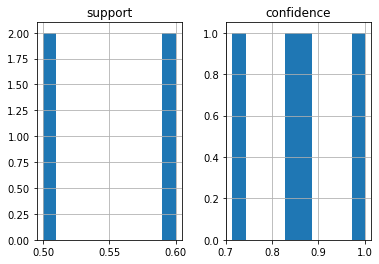

In [87]:
rule3[['support','confidence']].hist()

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

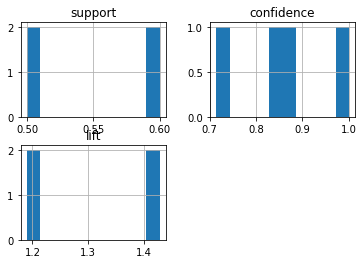

In [88]:
rule3[['support','confidence','lift']].hist()

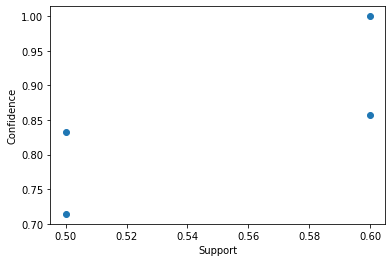

In [89]:
plt.scatter(rule3['support'],rule3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

<Axes: xlabel='lift'>

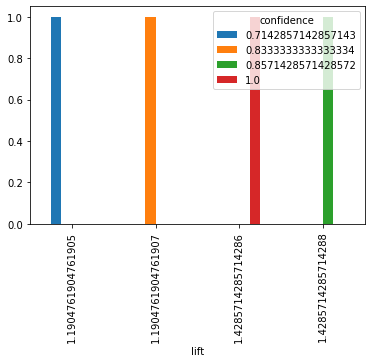

In [90]:
pd.crosstab(rule3.lift,rule3.confidence).plot(kind="bar")

<ipython-input-91-519ae263a353>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rule3['lift'])


<Axes: xlabel='lift', ylabel='Density'>

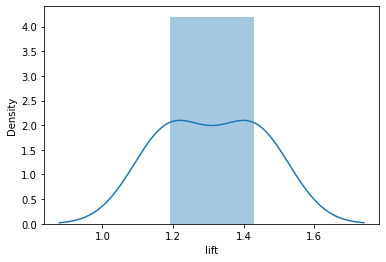

In [91]:
sns.distplot(rule3['lift'])

In [93]:
#4
frequent_itemsets = apriori(movie2, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,"(Gladiator, Patriot)"


In [94]:
rule4 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.9)
rule4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75


In [95]:
rule4.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75


In [96]:
rule4.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75


In [97]:
rule4[rule4.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

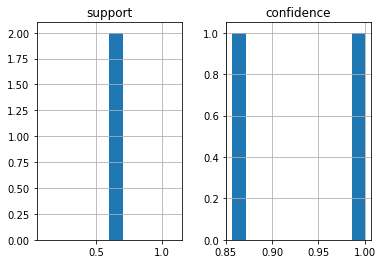

In [98]:
rule4[['support','confidence']].hist()

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

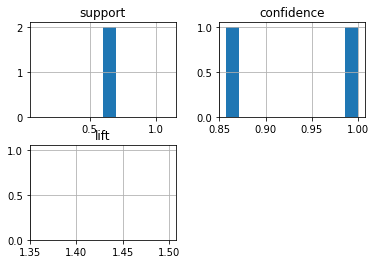

In [99]:
rule4[['support','confidence','lift']].hist()

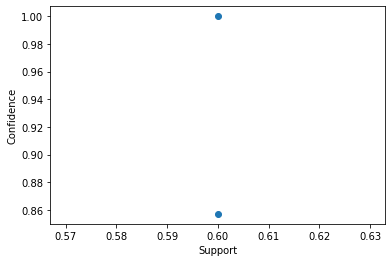

In [100]:
plt.scatter(rule4['support'],rule4['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

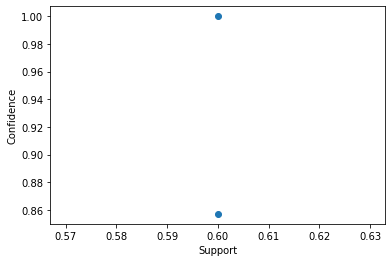

In [101]:
plt.scatter(rule4['support'],rule4['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

<ipython-input-102-e02db3b084b2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rule4['lift'])


<Axes: xlabel='lift', ylabel='Density'>

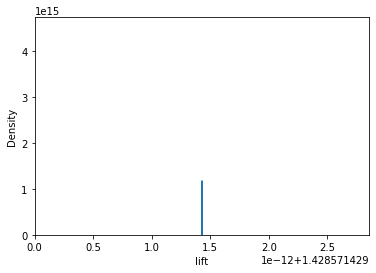

In [102]:
sns.distplot(rule4['lift'])